In [295]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.impute import SimpleImputer
import math
import numpy as np
import random
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor



import pandas as pd
df =pd.read_csv('https://gist.githubusercontent.com/razanSomari/99dc5ddefd5f9f352f7ec889d2696084/raw/7350743426de5e45733957fbcd10ddf4e2175bff/ForestFires.csv')




# Data exploration 

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [297]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


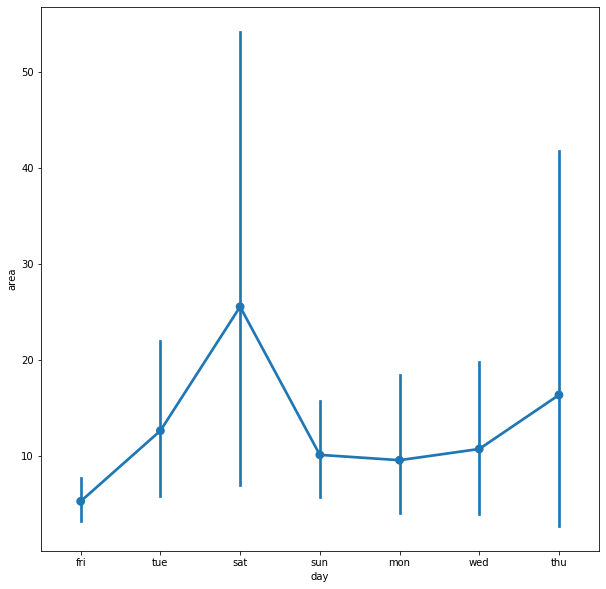

In [298]:
fig,ax = plt.subplots()
sn.pointplot(data=df[['day','area']],x='day',y='area',ax=ax)

(5.0, 0.0)

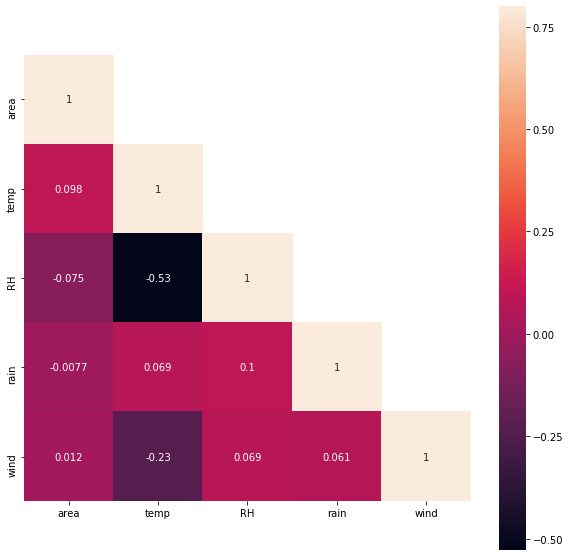

In [299]:
import numpy as np
corrMatt = scaled_df[['area','temp', 'RH','rain','wind']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
ax=sn.heatmap(corrMatt, mask=mask, vmax=.8, square=True,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [300]:
df.isnull().sum()
#there is no null values 

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

# Preprocessing 

In [301]:
#encoding the catogrical values to numrical values 
days = df['day'].unique()
days_dict = dict(zip(days, range(1, len(days)))) 
print(days_dict)

d = 1;
for i in range(len(days)):
    df.day = df.day.str.replace(days[i], str(d))
    d=d+1

months = df['month'].unique()
months_dict = dict(zip(months, range(1, len(months))))
print(months_dict)

d = 1;
for i in range(len(months)):
    df.month = df.month.str.replace(months[i], str(d))
    d=d+1


df.month= df.month.astype('int')
df.day= df.day.astype('int')
df.area= df.area.astype('int')

df.head() 

{'fri': 1, 'tue': 2, 'sat': 3, 'sun': 4, 'mon': 5, 'wed': 6}
{'mar': 1, 'oct': 2, 'aug': 3, 'sep': 4, 'apr': 5, 'jun': 6, 'jul': 7, 'feb': 8, 'jan': 9, 'dec': 10, 'may': 11}


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,1,1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,2,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,2,3,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,1,1,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,1,4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [302]:
description = df.describe()
data_range = description.iloc[7]-description.iloc[3]

print(data_range)

X           8.0
Y           7.0
month      11.0
day         6.0
FFMC       77.5
DMC       290.2
DC        852.7
ISI        56.1
temp       31.1
RH         85.0
wind        9.0
rain        6.4
area     1090.0
dtype: float64


In [303]:
scaled_df = df;
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df)
scaled_df = scaled_df.rename(columns={0: 'X', 1: 'Y', 2:'month', 3:'day', 4:'FFMC', 5:'DMC', 
                   6:'DC', 7:'ISI', 8:'temp',9: 'RH',10:'wind', 11:'rain',12: 'area'})
scaled_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.750,0.428571,0.000000,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.750,0.285714,0.090909,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.750,0.285714,0.090909,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.875,0.571429,0.000000,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.875,0.571429,0.000000,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


In [304]:
from sklearn.model_selection import train_test_split
X = scaled_df[["X", "Y", "month", "day","FFMC",'DMC','DC','ISI','temp','RH','wind','rain']]
y = scaled_df["area"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Model Bulding 

In [305]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,50,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")
mlp.fit(X_train, y_train)
predicted_y = mlp.predict(X_test)

acc_mlp = round(mean_squared_error(y_test, predicted_y), 6)
print(mlp)

print("Mean squared error: ", mean_squared_error(y_test, predicted_y))
print('Variance score: %.2f' % r2_score(y_test, predicted_y))

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(150, 50, 50), learning_rate='adaptive',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
Mean squared error:  0.004496758873225728
Variance score: -4.81


In [306]:
svm_model = svm.SVR(gamma='auto')

svm_model.fit(X_train, y_train)
predicted_y = svm_model.predict(X_test)
acc_svm = round(mean_squared_error(y_test, predicted_y) , 6)

print(svm_model)

print("Mean squared error: ", mean_squared_error(y_test, predicted_y))
print('Variance score: %.2f' % r2_score(y_test, predicted_y))



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean squared error:  0.008779708098342182
Variance score: -10.34


In [307]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
predicted_y = linear_regression.predict(X_test)

acc_linear = round(mean_squared_error(y_test, predicted_y), 6)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(y_test, predicted_y))
print('Variance score: %.2f' % r2_score(y_test, predicted_y))


Coefficients: 
 [ 0.0154564  -0.00440403  0.01637818  0.00183021  0.00960134  0.02233584
 -0.00506783 -0.04548916  0.02931932 -0.01804382  0.01105494 -0.0203125 ]

Mean squared error:  0.0007915014028774096
Variance score: -0.02


# Model Selection 

In [308]:
results = pd.DataFrame({
    'Model': ['nural network',  'Support Vector Machines','linear regrssion'],
    'Score': [ acc_mlp, acc_svm, acc_linear]})

result_df = results.sort_values(by='Score')
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.000792,linear regrssion
0.004497,nural network
0.008780,Support Vector Machines


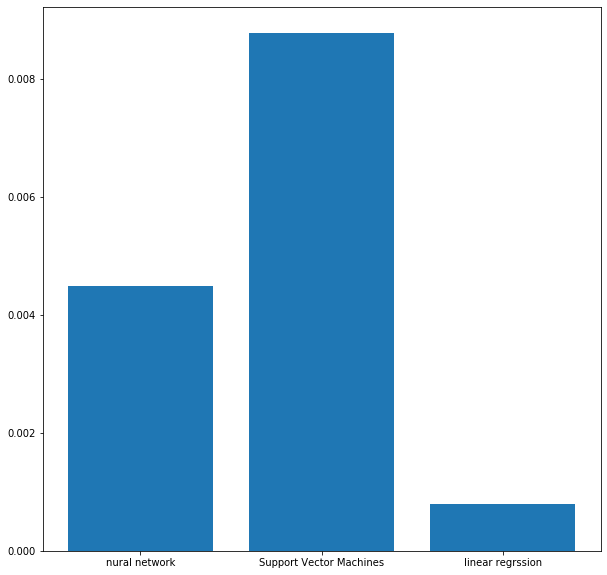

In [309]:
# Make a fake dataset:
height = [ acc_mlp, acc_svm, acc_linear]
bars = ('nural network',  'Support Vector Machines','linear regrssion')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height)
 
plt.xticks(y_pos, bars)

plt.show()

